In [1]:
import time
start_time = time.perf_counter()

## Versions, housekeeping

In [2]:
%matplotlib inline
# version check
import numpy
print('The numpy version is {}.'.format(numpy.__version__))
import pandas
print('The pandas version is {}.'.format(pandas.__version__))
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import matplotlib
print('The matplotlib version is {}.'.format(matplotlib.__version__))
import regex
print('The regex version is {}.'.format(regex.__version__))
import scipy
print('The scipy version is {}.'.format(scipy.__version__))

The numpy version is 1.18.1.
The pandas version is 1.0.4.
The scikit-learn version is 0.23.1.
The matplotlib version is 3.2.1.
The regex version is 2.5.80.
The scipy version is 1.4.1.


In [3]:
# set random state for reproducibility
random_state = 42

# view number of output entries
view_n_entries = 5

# default numpy settings
import numpy as np
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 80

# update settings
import numpy as np
np.set_printoptions(edgeitems=15, linewidth=150, 
    formatter=dict(float=lambda x: "%.2f" % x))

# update pandas settings
import pandas as pd
pd.set_option('max_colwidth', 200)
pd.options.display.max_columns = 50
pd.options.display.max_rows = 150
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# system
import sys
#sys.getsizeof

# timeit
import timeit

## Plotting Functions

In [4]:
# plotting functions
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("notebook")

def just_character_counts(df, col='m_body'):
    A = np.array(df.loc[:, col]) 
    getlength = np.vectorize(len)
    _ = getlength(A)
    _ = np.sum(_)
    return _

def get_character_counts(df, col='m_body', new_name='n_char'):
    A = np.array(df.loc[:, col]) 
    getlength = np.vectorize(len)
    df[new_name] = getlength(A)
    return df

def plot_ecdf(x, xlab='', ylab='', title='', color=None, xlim=None, ylim=None, logx=False, logy=False, hline=None, vline=None, alpha=1, s=1):
    x = np.sort(x)
    n = x.size
    y = np.arange(1, n+1) / n
    plt.scatter(x, y, color=color, s=s, alpha=alpha)
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel(ylab, fontsize=14)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)
    if logx == True:
        plt.xscale('log')
    if logy == True:
        plt.yscale('log')
    if hline is not None:
        plt.axhline(hline, color='r', linestyle='--')
    if vline is not None:
        plt.axvline(vline, color='r', linestyle='--')

def plot_scatter(x, y, xlab='', ylab='', title='', logx=False, logy=False, hline=None, vline=None, s=None):
    plt.scatter(x, y, alpha=0.25)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    if logx == True:
        plt.xscale('log')
    if logy == True:
        plt.yscale('log')
    if hline is not None:
        plt.axhline(hline, color='r', linestyle='--')
    if vline is not None:
        plt.axvline(vline, color='r', linestyle='--')

def plot_2_2(x, y, suptitle='', hline=None, vline=None):
    plt.figure(figsize=(10,10))

    plt.subplot(2, 2, 1)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 1: linx, liny', logx=False, logy=False, hline=None, vline=None)
    plt.subplot(2, 2, 2)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 2: linx, logy', logx=False, logy=True, hline=None, vline=None)
    plt.subplot(2, 2, 3)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 3: linx, liny', logx=True, logy=False, hline=None, vline=None)
    plt.subplot(2, 2, 4)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 4: linx, logy', logx=True, logy=True, hline=None, vline=None)

    plt.suptitle(suptitle, fontsize=16)
    plt.show() 

def plot_2_4(_, suptitle='', hline=None, vline=None):
    plt.figure(figsize=(20,10))

    plt.subplot(2, 4, 1)
    _.plot(kind='hist', bins=30, title='Plot 1: linx, liny', logx=False, logy=False)
    plt.subplot(2, 4, 2)
    _.plot(kind='hist', bins=30, title='Plot 2: linx, logy', logx=False, logy=True)
    plt.subplot(2, 4, 3)
    plot_ecdf(_, xlab='', ylab='', title='Plot 3: linx, liny', logx=False, logy=False, hline=None, vline=None)
    plt.subplot(2, 4, 4)
    plot_ecdf(_, xlab='', ylab='', title='Plot 4: linx, logy', logx=False, logy=True, hline=None, vline=None)
    plt.subplot(2, 4, 5)
    _.plot(kind='hist', bins=30, title='Plot 5: logx, liny', logx=True, logy=False)
    plt.subplot(2, 4, 6)
    _.plot(kind='hist', bins=30, title='Plot 6: logx, logy', logx=True, logy=True)
    plt.subplot(2, 4, 7)
    plot_ecdf(_, xlab='', ylab='', title='Plot 7: logx, liny', logx=True, logy=False, hline=None, vline=None)
    plt.subplot(2, 4, 8)
    plot_ecdf(_, xlab='', ylab='', title='Plot 8: logx, logy', logx=True, logy=True, hline=None, vline=None)
    plt.suptitle(suptitle, fontsize=16)
    plt.show()   

    
def plot_sender_stats(df, n, suptitle=''):
    plt.figure(figsize=(14, 12))
    plt.subplot(2, 2, 1) # plot 1: horizontal bar
    _ = pd.DataFrame(df.groupby(['m_from']).size()).sort_values(0,ascending=False).reset_index() # convert data
    l = np.array(_.iloc[:,0]) # labels
    v = np.array(_.iloc[:,1]) # values
    plt.barh(np.linspace(n,1,n), v[:n], tick_label=l[:n])
    plt.subplot(2, 2, 2) # plot 2: full histogram
    plt.hist(v, bins=30)
    plt.yscale('log')
    plt.subplot(2, 2, 3) # plot 3: pie
    pie_x = [len(df[df.gender == 0].m_from.unique()), len(df[df.gender == 1].m_from.unique())]
    pie_lab = ['boy: %d email addresses' % (pie_x[0]), 'girl: %d email addresses' % (pie_x[1])]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(2, 2, 4) # plot 4: ecdf
    plot_ecdf(v, xlim=(0,stats.scoreatpercentile(v,95)))
    plt.suptitle(suptitle)
    plt.show()
    print(_.describe())
    print(stats.describe(v))
    
def plot_character_frequency(df, suptitle=''):
    v = np.array(df.n_characters_start.values) # values
    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1) # plot 1: pie chart
    pie_x = [df[df.gender == 0].n_characters_start.sum(),df[df.gender == 1].n_characters_start.sum()]
    pie_lab = ['boy: %.3g characters' % (pie_x[0]), 'girl: %.3g characters' % (pie_x[1])]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(1, 3, 2) # plot 2: full histogram
    plt.hist(v, bins=30)
    plt.yscale('log')
    plt.subplot(1, 3, 3) # plot 3: ecdf
    plot_ecdf(v, xlim=(0,stats.scoreatpercentile(v,95)))
    plt.show()
    print(df.n_characters_start.describe())
    print(stats.describe(v))
    

    
def plot_gender_character_frequency(df, col='m_body', new_name='n_char', suptitle='', alpha=0.1,):
    df = get_character_counts(df, col=col, new_name=new_name)
    bv = np.array(df[df.gender == 0][new_name].values) # values
    gv = np.array(df[df.gender == 1][new_name].values) # values
    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1) # plot 1: pie chart
    pie_x = [np.sum(bv), np.sum(gv)]
    pie_lab = ['boy: %dM characters' % (pie_x[0]/1000000), 'girl: %dM characters' % (pie_x[1]/1000000)]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(1, 3, 2) # plot 2: full histogram
    plt.hist(x=[bv, gv], bins=10, color=['#347DC1', '#FF85A2'], rwidth=1,)
    #plt.hist(gv, bins=30, color='#FF85A2')
    plt.yscale('log')
    plt.subplot(1, 3, 3) # plot 3: ecdf
    plot_ecdf(bv, xlim=(0,stats.scoreatpercentile(bv,97)), color='#347DC1', alpha=.5, s=.1)
    plot_ecdf(gv, xlim=(0,stats.scoreatpercentile(gv,97)), color='#FF85A2', alpha=.25, s=.1)
    plt.suptitle(suptitle.upper())
    plt.tight_layout()
    plt.show()
    
    bd = df[df.gender == 0][new_name].describe()
    bd.name = 'boy'
    gd = df[df.gender == 1][new_name].describe()
    gd.name = 'girl'
    bg_describe = pd.concat([bd, gd], axis=1)
    print(bg_describe)

### Threadpool executor for this notebook's user functions

In [5]:
%%time
def threadpool_executor(io_func=None, df=None, series=None, merge_back=False, idict=None, new_name=None):
    """Use this to pass a dataframe series to the threadpool executor to trigger async processessing. Make sure the user function (io_func) meets the following conditions:
    - Receives two arguments: series index position & series values
    - Has an output dictionary that assembles the index, values as key, values for reassembly
    - Output dictionary is set as the return by name within the called function
    
    io_func: user function to pass to threadpoolexecutor; df: dataframe with data; series: string name of column; idict: dictionary linked to user function to catch output values; new_name: string for new column name
    when reassigning values back to the main dataframe"""
    
    if (io_func is None) | (df is None) | (series is None):
        sys.exit("'None' received as input for either io_func, df, or series. Please assign a value and try again.")
    if (merge_back is True) & (idict is None):
        sys.exit("'merge_back is set to True. However, no dictionary has been passed to capture output. Please set the idict= argument to an initialized dictionary and try again.'")
    
    import concurrent.futures
    with concurrent.futures.ThreadPoolExecutor() as executor:  
        executor.map(io_func, df[series].index, df[series])
    
    if merge_back == True: # will merge the processed values back to the initial dataframe
        if idict is not None:
            new_frame = pd.DataFrame.from_dict(idict, orient='index')
            if new_name is not None:
                new_frame.columns = [new_name]
                df = pd.merge(df, new_frame, how='left', left_index=True, right_index=True, copy=False)
            else:
                sys.exit("Merge back is True, but no series or name for a new column has been received. If a new column is desired, please pass a new_name. Otherwise, please pass, 'series' to merge_back to replace the current series.")
    if merge_back == 'series': # will drop the old series and replace it with the new processed documents
        df = df.drop(series, axis=1)
        new_frame = pd.DataFrame.from_dict(idict, orient='index')
        new_frame.columns = [series]
        df = pd.merge(df, new_frame, how='left', left_index=True, right_index=True, copy=False)
            
    return df

Wall time: 0 ns


# Notebook Overview
In this notebook we'll create regex patterns to decide on __by line__ improvements regarding:
- Quoted-printable text characters removed so text can be processed;
- Duplicate data captured in _replies and forwards_ removed from email body by splitting;
- Signatures that add weight to names, titles, and contact information _which undermine our model's predictive power_ removed by substitution;

EDA on the following below:
- Quoted-printable text correction;
- Timestamps related to forwards, replies;
- Forward-related strings;
- Reply-related strings;
- Signatures;

## User functions for this notebook

### 5 m-dash characters
A lot of duplicate body identifiers are associated with multiple m-dash. Some message bodies have been observed using the m-dash within text as well (ex. "Hey there-can you call me?").    
5 m-dash's have been observed to be a good cutoff between user m-dash use and duplicate body identifiers.

In [6]:
mdash = re.compile('-----')
def mdash_function(doc_idx, doc):
    """Pass document (or pandas .apply() to corpus column) to split on the above pattern"""
    try:
        #catch_list_01.append(re.search(timestamp1, doc)[0])
        doc = re.split(mdash, doc, maxsplit=1)[0]
    except:
        pass
    
    returns_dict[doc_idx] = doc

### Correcting Quoted-printable text codes across email text

In [7]:
%%time
import regex as re
eq18 = re.compile('=018')
eq01a = re.compile('=01&')
eq01b = re.compile('=01,')
eq01c = re.compile('=01;')
eq09 = re.compile('=09')
eq20 = re.compile('=20')
eq30 = re.compile('30=')
eq19 = re.compile('=19')
eq = re.compile('=\n')
def quote_printables_function(doc_idx, doc):
    """Pass document (or pandas .apply() to corpus column) to SUBSTITUTE '' for the above patterns"""
    try:
        doc = re.sub(eq18, '', doc)
    except:
        pass
    try:
        doc = re.sub(eq01a, '', doc)
    except:
        pass
    try:
        doc = re.sub(eq01b, "'", doc)
    except:
        pass    
    try:
        doc = re.sub(eq01c, ' ', doc)
    except:
        pass 
    try:
        doc = re.sub(eq09, '', doc)
    except:
        pass    
    try:
        doc = re.sub(eq20, '', doc)
    except:
        pass    
    try:
        doc = re.sub(eq30, '', doc)
    except:
        pass
    try:
        doc = re.sub(eq19, '', doc)
    except:
        pass
    try:
        doc = re.sub(eq, '', doc)
    except:
        pass
    
    returns_dict[doc_idx] = doc

Wall time: 1 ms


### Timestamps associated with replies, forwards



Pattern review: _'\n.+?\n.+?\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}\s\w\w'_    
    __\n.\*?__: includes the line before the date: _Earline Kendall_    
    __\n.\*?__: _will catch any text prior to the below string on the same line_    
    __\d{2}/\d{2}/\d{4}__: 06/14/2000    
    __\s__ - space    
    __\d{2}:\d{2}__ - 10:19    
    __\s__ - space    
    __\w\w__ - two letters - AM    
    
Example catch:

    Earline Kendall
    06/14/2000 10:19 AM
    
Our second pattern does almost the same thing, but catches the 00:00:00 time format.
    
> It's important to include the '?' character after the '.\*' here because '.\*' is a __greedy qualifier__.
> 
> Greedy qualifiers capture the entire pattern match, all the way to the end. If we used '.\*' without the '?', the regex pattern would just return the whole chunk (Or the entire email if _dotall_ flag is passed).
> 
> 

In [8]:
%%time
timestamp1 = re.compile('(\n|^).+?\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}\s\w\w') # 06/14/2000 10:19 AM
timestamp2 = re.compile('(\n|^).+?\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}:\d{2}') # 08/28/2000 09:10:10
def timestamps_function(doc_idx, doc):
    """Pass document (or pandas .apply() to corpus column) to split on the above pattern"""
    try:
        #catch_list_01.append(re.search(timestamp1, doc)[0])
        doc = re.split(timestamp1, doc, maxsplit=1)[0]
    except:
        pass
    try:
        #catch_list_02.append(re.search(timestamp2, doc)[0])
        doc = re.split(timestamp2, doc, maxsplit=1)[0]
    except:
        pass
    
    returns_dict[doc_idx] = doc

Wall time: 1e+03 µs


### Forward strings

In [9]:
%%time
import regex as re
fwd_by = re.compile('(Forwarded) by')
ect_wrote = re.compile('ECT wrote on')
right_arrow = re.compile('^>.+$', flags=re.MULTILINE)
orig_msg = re.compile('.+?Original Message')
fwd_msg = re.compile('(Forwarded) Message')

def forward_strings_function(doc_idx, doc):
    """Pass document (or pandas .apply() to corpus column) to split on the above pattern"""
    try:
        doc = re.split(fwd_by, doc, maxsplit=1)[0]
    except:
        pass
    try:
        doc = re.split(ect_wrote, doc, maxsplit=1)[0]
    except:
        pass
    try:
        doc = re.split(right_arrow, doc, maxsplit=1)[0]
    except:
        pass
    try:
        doc = re.split(orig_msg, doc, maxsplit=1)[0]
    except:
        pass
    try:
        doc = re.split(fwd_msg, doc, maxsplit=1)[0]
    except:
        pass    
    
    returns_dict[doc_idx] = doc

Wall time: 1e+03 µs


### Replies
Capture a pattern created by the _From:, To:, cc:, and Subject:_ strings across multiple lines (_hence the re.S dotall flag; makes the . pattern catch include newlines_). Example:

    From:  Susan Scott                           01/24/2000 10:50 AM


    To: Keith Petersen/ET&S/Enron@ENRON
    cc: Donna Martens/ET&S/Enron@ENRON, Drew Fossum@ENRON, Mary Kay 
    Miller/ET&S/Enron@ENRON 

    Subject: Re: Gallup Extension 

In [10]:
%%time
import regex as re

from_to_cc_subj = re.compile('\n[^\n]*?From:.+?Subject:|From:.+?Subject:', flags=(re.S|re.I))
to_cc_subj = re.compile('\n[^\n]*?To:.+?Subject:|To:.+?Subject:', flags=(re.S|re.I))


def reply_strings_function(doc_idx, doc):
    """Pass document (or pandas .apply() to corpus column) to split on the above pattern"""
    try:
        doc = re.split(from_to_cc_subj, doc, maxsplit=1)[0]
    except:
        pass
    try:
        doc = re.split(to_cc_subj, doc, maxsplit=1)[0]
    except:
        pass
    
    returns_dict[doc_idx] = doc

Wall time: 1 ms


### Signatures
Sub instead of split so we can 'sub' in a null string for subsequent regex patterns (ie the triple \n). Since we're anchored to the end of the email with "$" we can throw multiple versions of the regex pattern at the text without having it slowly crawl up the email and keep eating the bottom over and over again - potentially destroying valuable input data. Examples:

    Sara Shackleton
    Enron North America Corp.
    1400 Smith Street, EB 3801a
    Houston, Texas  77002
    713-853-5620 (phone)
    713-646-3490 (fax)
    sara.shackleton@enron.com

    Debra Perlingiere
    Enron North America Corp.
    Legal Department
    1400 Smith Street, EB 3885
    Houston, Texas 77002
    dperlin@enron.com
    Phone 713-853-7658
    Fax  713-646-3490

In [11]:
%%time
import regex as re
sig9 = re.compile('\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n*$')
sig8 = re.compile('\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n*$')
sig7 = re.compile('\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n*$')
sig6 = re.compile('\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n*$')
sig5 = re.compile('\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n*$')
sig4 = re.compile('\n.{7,31}\n.{7,31}\n.{7,31}\n.{7,31}\n*$')
sig3 = re.compile('\n.{7,31}\n.{7,31}\n.{7,31}\n*$')
sig2 = re.compile('\n.{7,31}\n.{7,31}\n*$')

def signatures_function(doc_idx, doc):
    """Pass document (or pandas .apply() to corpus column) to split on the above pattern"""
    try:
        #catch_list.append(re.search(sig9, doc)[0])
        doc = re.sub(sig9, '\n.\n.', doc)
    except:
        pass
    try:
        #catch_list.append(re.search(sig8, doc)[0])
        doc = re.sub(sig8, '\n.\n.', doc)
    except:
        pass
    try:
        #catch_list.append(re.search(sig7, doc)[0])
        doc = re.sub(sig7, '\n.\n.', doc)
    except:
        pass
    try:
        #catch_list.append(re.search(sig6, doc)[0])
        doc = re.sub(sig6, '\n.\n.', doc)
    except:
        pass
    try:
        #catch_list.append(re.search(sig5, doc)[0])
        doc = re.sub(sig5, '\n.\n.', doc)
    except:
        pass
    try:
        #catch_list.append(re.search(sig4, doc)[0])
        doc = re.sub(sig4, '\n.\n.', doc)
    except:
        pass
    try:
        #catch_list.append(re.search(sig3, doc)[0])
        doc = re.sub(sig3, '\n.\n.', doc)
    except:
        pass
    try:
        #catch_list.append(re.search(sig2, doc)[0])
        doc = re.sub(sig2, '\n.\n.', doc)
    except:
        pass
    
    returns_dict[doc_idx] = doc

Wall time: 2 ms


# Import dataframe

In [12]:
df = pd.read_csv('./data/enron/clean_clean_by_filter.csv', index_col=0)

In [13]:
df.head(2)

,f_dir,m_id,m_date,m_from,m_to,m_cc,m_bcc,m_subj,mime_vers,cont_type,encode,x_from,x_to,x_cc,x_bcc,x_fold,x_orig,x_fname,o_body,m_body,gender,n_emails_sent,n_characters_start,n_char
0,./data/enron/maildir/forney-j/sent_items/327,<15140281.1075852396240.JavaMail.evans@thyme>,"Wed, 8 Aug 2001 14:43:47 -0700 (PDT)",m..forney@enron.com,"jeffrey.miller@enron.com, eric.saibi@enron.com, joe.errigo@enron.com,",NaN,NaN,DC Tie Spreadsheet,1.00,text/plain; charset=us-ascii,7bit,"Forney, John M. </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JFORNEY>","Miller, Jeffrey </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Jmiller>, Saibi, Eric </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Esaibi>, Errigo, Joe </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Jerrigo>, McElreath, Alexander </O=ENR...",NaN,NaN,"\JFORNEY (Non-Privileged)\Forney, John M.\Sent Items",FORNEY-J,JFORNEY (Non-Privileged).pst\n\n,"Message-ID: <15140281.1075852396240.JavaMail.evans@thyme>\nDate: Wed, 8 Aug 2001 14:43:47 -0700 (PDT)\nFrom: m..forney@enron.com\nTo: jeffrey.miller@enron.com, eric.saibi@enron.com, joe.errigo@enr...",\n\nErcot is now requiring that we fill out and fax the attached form to them when we have imported/exported across one of the DC ties.\nThe file is located in:\n\nM:electric/24hour/ercot/dc sche...,0.00,450,330,330
1,./data/enron/maildir/kitchen-l/_americas/netco_hr/2,<24343297.1075840881041.JavaMail.evans@thyme>,"Tue, 5 Feb 2002 08:16:46 -0800 (PST)",david.oxley@enron.com,rob.milnthorp@enron.com,"louise.kitchen@enron.com, amy.fitzpatrick@enron.com","louise.kitchen@enron.com, amy.fitzpatrick@enron.com",RE: ECC New Grads,1.00,text/plain; charset=us-ascii,7bit,"Oxley, David </O=ENRON/OU=NA/CN=RECIPIENTS/CN=DOXLEY>","Milnthorp, Rob </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Rmilnth>","Kitchen, Louise </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Lkitchen>, Fitzpatrick, Amy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=AFitzpat>",NaN,"\ExMerge - Kitchen, Louise\'Americas\Netco HR",KITCHEN-L,louise kitchen 2-7-02.pst\n\n,"Message-ID: <24343297.1075840881041.JavaMail.evans@thyme>\nDate: Tue, 5 Feb 2002 08:16:46 -0800 (PST)\nFrom: david.oxley@enron.com\nTo: rob.milnthorp@enron.com\nSubject: RE: ECC New Grads\nCc: lou...","Issue is headcount approval. In the next 6 months I'm not sure we can commit to any increase, although if we get a flying start in Canada it is possible. While I think we can explore whether UBS a...",0.00,362,999,999


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179994 entries, 0 to 179993
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   f_dir               179994 non-null  object 
 1   m_id                179994 non-null  object 
 2   m_date              179994 non-null  object 
 3   m_from              179994 non-null  object 
 4   m_to                176644 non-null  object 
 5   m_cc                50264 non-null   object 
 6   m_bcc               46993 non-null   object 
 7   m_subj              172849 non-null  object 
 8   mime_vers           179994 non-null  float64
 9   cont_type           179994 non-null  object 
 10  encode              179994 non-null  object 
 11  x_from              179994 non-null  object 
 12  x_to                177312 non-null  object 
 13  x_cc                47363 non-null   object 
 14  x_bcc               134 non-null     object 
 15  x_fold              179994 non-nul

## Create a Filter Dictionary
Let's track the impact of each filter as we explore the dataframes.

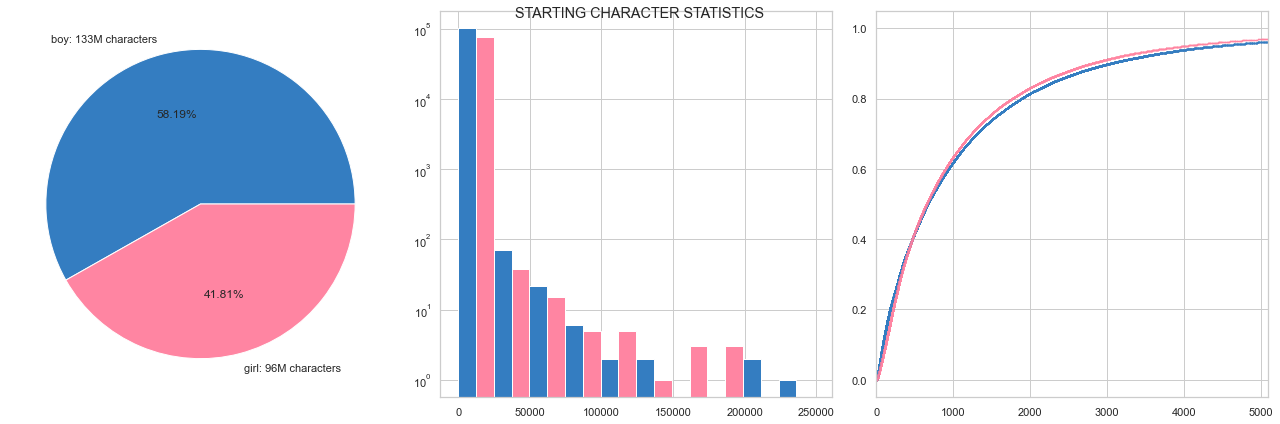

            boy      girl
count 102237.00  77757.00
mean    1309.88   1237.48
std     2673.21   2746.24
min        1.00      1.00
25%      242.00    270.00
50%      669.00    652.00
75%     1562.00   1468.00
max   248665.00 177791.00
Wall time: 1.48 s


In [15]:
%%time
filt_dict = {}
cond_dict = {}
plot_gender_character_frequency(df, col='m_body', new_name='start_char', suptitle='Starting Character Statistics', alpha=0.1)

## Review number of emails that have string, character reduction
Overview:
- Create new columns for each reduction to view the character impact;
- Apply the selected filters together at the end and create a processed column;
- Remove the added columns from this notebook to keep the dataframe manageable; and,
- Output to csv;

### 5 M-dash

In [16]:
%%time
filter_condition = df[  # collect number of emails that have string
    df.m_body.str.contains('-----')
]

filter_string = 'mdash'

cond_dict[filter_string] = filter_condition.index
filt_dict[filter_string] = [len(filter_condition.query("gender == 0")), len(filter_condition.query("gender == 1"))]

Wall time: 323 ms


In [17]:
%%time
returns_dict = {} # call threadpool user function, pass signature args
df = threadpool_executor(io_func=mdash_function, df=df, series='m_body', merge_back=True, idict=returns_dict, new_name=filter_string)

Wall time: 8.69 s


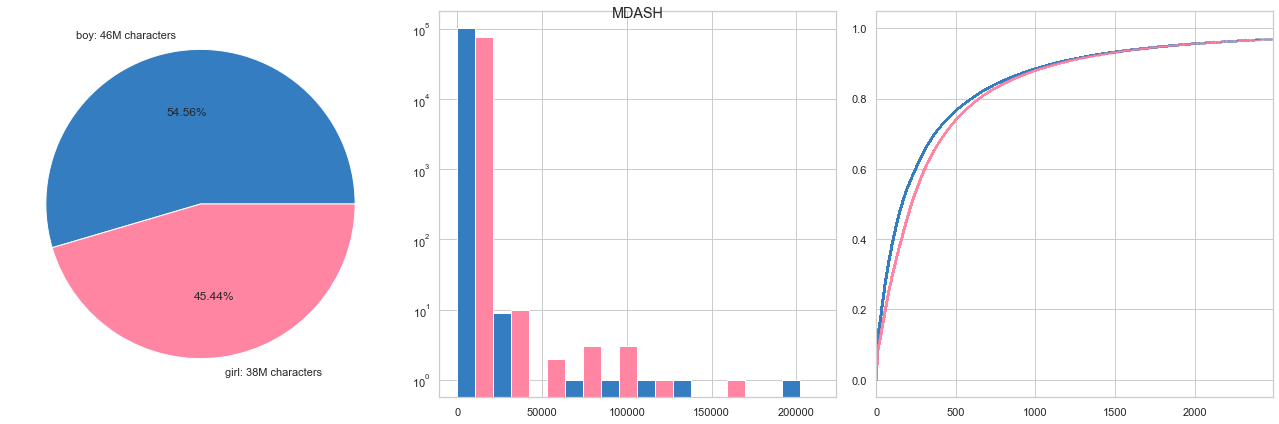

            boy      girl
count 102237.00  77757.00
mean     457.24    500.66
std     1359.50   1465.92
min        0.00      0.00
25%       45.00     74.00
50%      157.00    217.00
75%      457.00    517.00
max   212476.00 161617.00
#########################
[INDEX 1 INPUT EMAIL]
#########################

Issue is headcount approval. In the next 6 months I'm not sure we can commit to any increase, although if we get a flying start in Canada it is possible. While I think we can explore whether UBS are interested elsewhere, my feeling is that we can't commit to anything at this stage. If things are different in July them maybe we can reconsider if they haven't found something elsewhere.

David
 -----Original Message-----
From: 	Milnthorp, Rob  
Sent:	Tuesday, February 05, 2002 10:07 AM
To:	Oxley, David
Cc:	Kitchen, Louise
Subject:	ECC New Grads

David, we made offers to 4 new grads a few months ago to work for Enron Canada Corp. ECC is obviously going to renege on these offers. Is ther

In [18]:
%%time
plot_gender_character_frequency(df, col=filter_string, new_name='mdash_char', suptitle=filter_string, alpha=0.1,)

for idx, old, new in zip(filter_condition[:view_n_entries].index, df.loc[filter_condition[:view_n_entries].index, 'm_body'], df.loc[filter_condition[:view_n_entries].index, filter_string]):
    print('#########################\n[INDEX %s INPUT EMAIL]\n#########################\n' % (idx))
    print(old)
    print('######################\n[INDEX %s, FILTERED WITH %s]\n######################\n' % (idx, filter_string))
    print(new)

### Quoted-printable text codes across email text

In [19]:
%%time
filter_condition = df[  # collect number of emails that have string
    df.m_body.str.contains('=20') |
    df.m_body.str.contains('=01&') |
    df.m_body.str.contains('30=') |
    df.m_body.str.contains('=09') |
    df.m_body.str.contains('=018') |
    df.m_body.str.contains('=19')  |
    df.m_body.str.contains('=01,') |
    df.m_body.str.contains('=\n')  
    ]

filter_string = 'quote_printables'

cond_dict[filter_string] = filter_condition.index
filt_dict[filter_string] = [len(filter_condition.query("gender == 0")), len(filter_condition.query("gender == 1"))]

Wall time: 2.08 s


In [20]:
%%time
returns_dict = {} # call threadpool user function, pass signature args
df = threadpool_executor(io_func=quote_printables_function, df=df, series='m_body', merge_back=True, idict=returns_dict, new_name=filter_string)

Wall time: 33 s


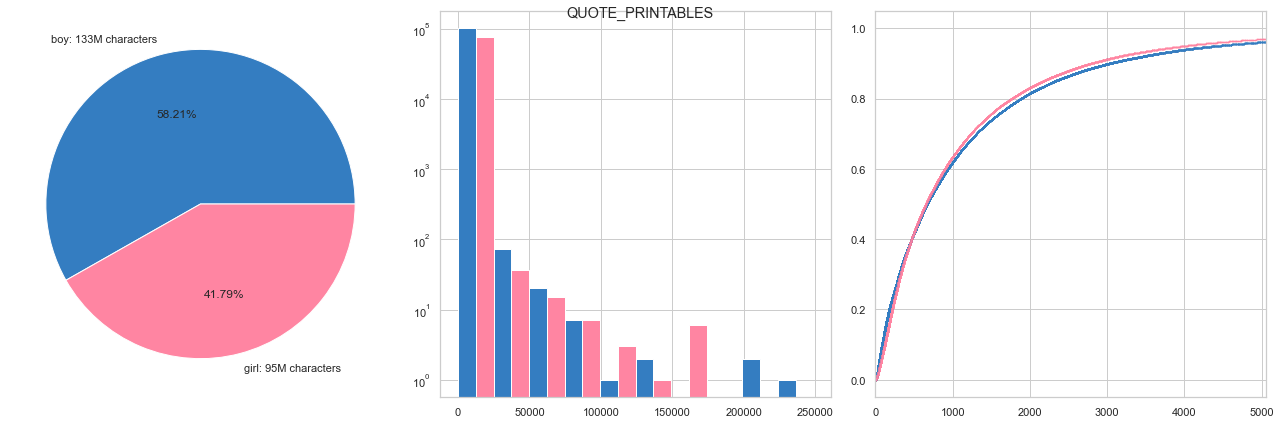

            boy      girl
count 102237.00  77757.00
mean    1304.79   1231.83
std     2649.42   2682.76
min        1.00      1.00
25%      242.00    270.00
50%      669.00    652.00
75%     1559.00   1466.00
max   248665.00 168892.00
#########################
[INDEX 5 INPUT EMAIL]
#########################

Thanks for documenting the proposed expenditure, James.

I will swallow the rental on the new circuit because it is essential in ord=
er=20
to support three or four (rather than two) users in the Brussels office. An=
d=20
the other equipment quotes look OK. So please go ahead and place orders; as=
=20
you know, the lack of capacity on the current link has become insupportable=
 -=20
we are experiencing constant crashes, application impairments and=20
disconnections. I should add that when the time comes for installation we=
=20
will require hardware and software support and training.  And as you know, =
a=20
full Brussels hardware audit, completion of Outlook migration and completio

In [21]:
%%time
plot_gender_character_frequency(df, col=filter_string, new_name='qp_char', suptitle=filter_string, alpha=0.1,)

for idx, old, new in zip(filter_condition[:view_n_entries].index, df.loc[filter_condition[:view_n_entries].index, 'm_body'], df.loc[filter_condition[:view_n_entries].index, filter_string]):
    print('#########################\n[INDEX %s INPUT EMAIL]\n#########################\n' % (idx))
    print(old)
    print('######################\n[INDEX %s, FILTERED WITH %s]\n######################\n' % (idx, filter_string))
    print(new)

### Timestamps associated with replies, forwards, etc

In [22]:
%%time
filter_condition = df[
    df.m_body.str.contains('(\n|^).+?\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}\s\w\w') |  # 06/14/2000 10:19 AM
    df.m_body.str.contains('(\n|^).+?\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}:\d{2}')    # 08/28/2000 09:10:10
]

filter_string = 'timestamps'

cond_dict[filter_string] = filter_condition.index
filt_dict[filter_string] = [len(filter_condition.query("gender == 0")), len(filter_condition.query("gender == 1"))]

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Wall time: 23.8 s


In [23]:
%%time
returns_dict = {} # call threadpool user function, pass signature args
df = threadpool_executor(io_func=timestamps_function, df=df, series='m_body', merge_back=True, idict=returns_dict, new_name=filter_string)

Wall time: 28.7 s


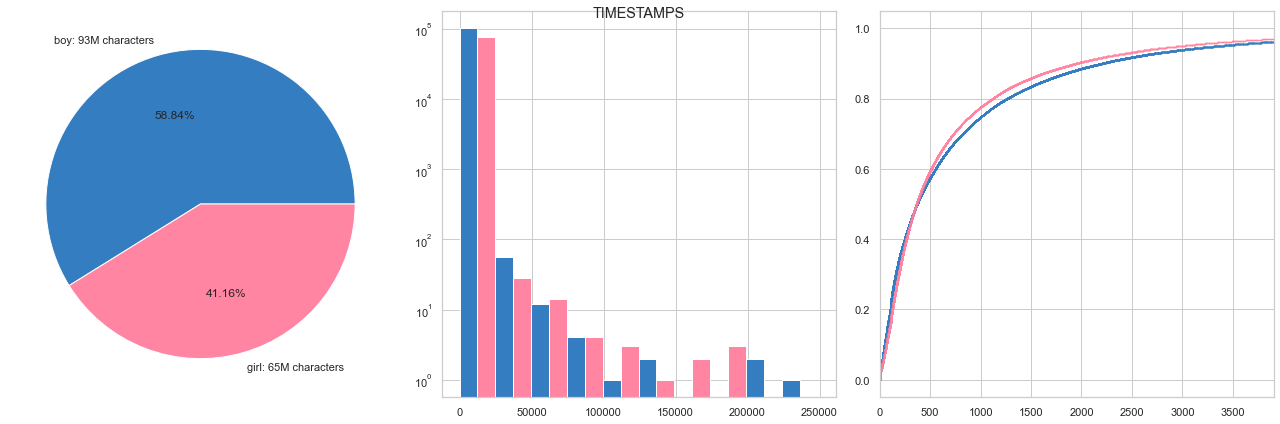

            boy      girl
count 102237.00  77757.00
mean     914.37    840.83
std     2340.64   2389.03
min        0.00      0.00
25%      125.00    155.00
50%      369.00    363.00
75%     1010.00    897.00
max   248665.00 177791.00
#########################
[INDEX 5 INPUT EMAIL]
#########################

Thanks for documenting the proposed expenditure, James.

I will swallow the rental on the new circuit because it is essential in ord=
er=20
to support three or four (rather than two) users in the Brussels office. An=
d=20
the other equipment quotes look OK. So please go ahead and place orders; as=
=20
you know, the lack of capacity on the current link has become insupportable=
 -=20
we are experiencing constant crashes, application impairments and=20
disconnections. I should add that when the time comes for installation we=
=20
will require hardware and software support and training.  And as you know, =
a=20
full Brussels hardware audit, completion of Outlook migration and completio

In [24]:
%%time
plot_gender_character_frequency(df, col=filter_string, new_name='tm_char', suptitle=filter_string, alpha=0.1,)

for idx, old, new in zip(filter_condition[:view_n_entries].index, df.loc[filter_condition[:view_n_entries].index, 'm_body'], df.loc[filter_condition[:view_n_entries].index, filter_string]):
    print('#########################\n[INDEX %s INPUT EMAIL]\n#########################\n' % (idx))
    print(old)
    print('######################\n[INDEX %s, FILTERED WITH %s]\n######################\n' % (idx, filter_string))
    print(new)

### 'Forwarded by,' 'Original message,' 'Forwarded message,' 'ECT wrote on'

In [25]:
%%time
filter_condition = df[ 
    df.m_body.str.contains('Forwarded by', regex=False) |
    df.m_body.str.contains('Original Message', regex=False) |
    df.m_body.str.contains('Forwarded message', regex=False) |
    df.m_body.str.contains('ECT wrote on', regex=False) |
    df.m_body.str.contains('^>.+$', flags=re.MULTILINE)
    ]

filter_string = 'forward_strings'

cond_dict[filter_string] = filter_condition.index
filt_dict['forward_strings'] = [len(filter_condition.query("gender == 0")), len(filter_condition.query("gender == 1"))]

Wall time: 3.6 s


In [26]:
%%time
returns_dict = {} # call threadpool user function, pass signature args
df = threadpool_executor(io_func=forward_strings_function, df=df, series='m_body', merge_back=True, idict=returns_dict, new_name=filter_string)

Wall time: 18.6 s


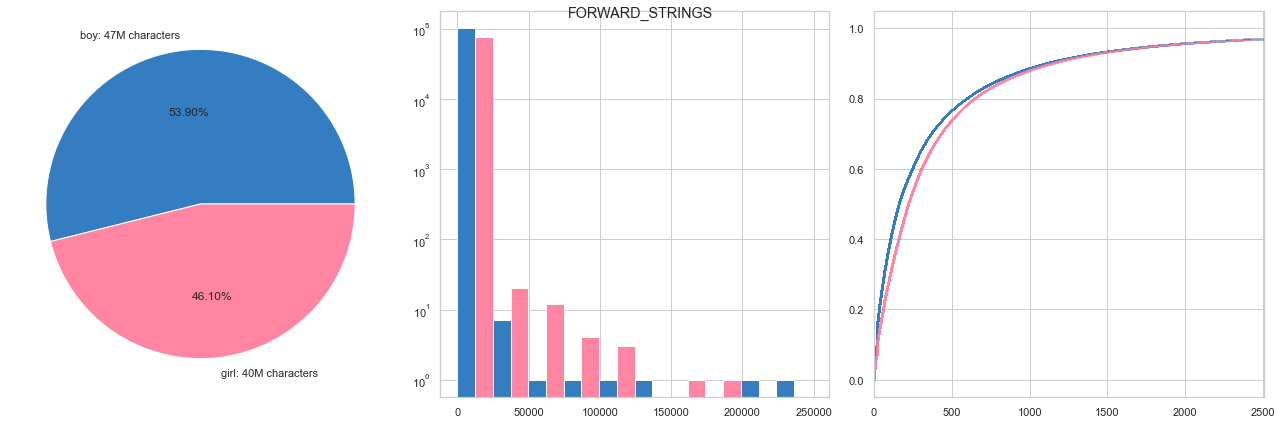

            boy      girl
count 102237.00  77757.00
mean     464.09    521.92
std     1573.38   1816.83
min        0.00      0.00
25%       48.00     80.00
50%      160.00    220.00
75%      461.00    522.00
max   248665.00 177791.00
#########################
[INDEX 1 INPUT EMAIL]
#########################

Issue is headcount approval. In the next 6 months I'm not sure we can commit to any increase, although if we get a flying start in Canada it is possible. While I think we can explore whether UBS are interested elsewhere, my feeling is that we can't commit to anything at this stage. If things are different in July them maybe we can reconsider if they haven't found something elsewhere.

David
 -----Original Message-----
From: 	Milnthorp, Rob  
Sent:	Tuesday, February 05, 2002 10:07 AM
To:	Oxley, David
Cc:	Kitchen, Louise
Subject:	ECC New Grads

David, we made offers to 4 new grads a few months ago to work for Enron Canada Corp. ECC is obviously going to renege on these offers. Is ther

In [27]:
%%time
plot_gender_character_frequency(df, col=filter_string, new_name='fwd_char', suptitle=filter_string, alpha=0.1,)

for idx, old, new in zip(filter_condition[:view_n_entries].index, df.loc[filter_condition[:view_n_entries].index, 'm_body'], df.loc[filter_condition[:view_n_entries].index, filter_string]):
    print('#########################\n[INDEX %s INPUT EMAIL]\n#########################\n' % (idx))
    print(old)
    print('######################\n[INDEX %s, FILTERED WITH %s]\n######################\n' % (idx, filter_string))
    print(new)

### Replies
Splits on To:, cc:, Subject: pattern observed in reply email preceeding the previous email text.   
(Note: second pattern alternative might be associated with _forwards_ but ~13 were observed after filtering, so will place pattern here for ease of access.

In [28]:
%%time
filter_condition = df[
    df.m_body.str.contains('\n[^\n]*?To:.+?cc:.+?Subject:|To:.+?cc:.+?Subject:', flags=re.S)
]

filter_string = 'reply_strings'

cond_dict[filter_string] = filter_condition.index
filt_dict[filter_string] = [len(filter_condition.query("gender == 0")), len(filter_condition.query("gender == 1"))]

Wall time: 9.45 s


In [29]:
%%time
returns_dict = {} # call threadpool user function, pass signature args
df = threadpool_executor(io_func=reply_strings_function, df=df, series='m_body', merge_back=True, idict=returns_dict, new_name=filter_string)

Wall time: 14.3 s


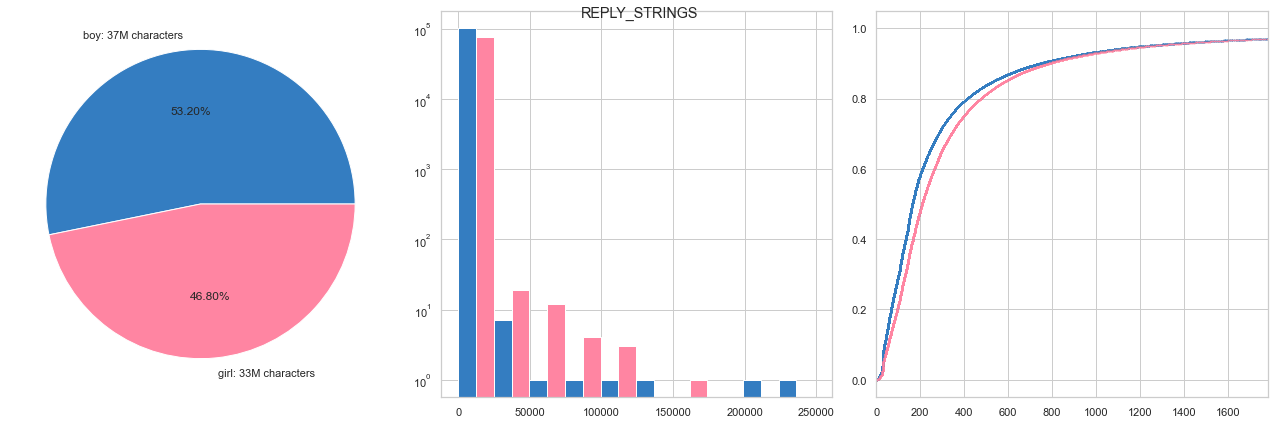

            boy      girl
count 102237.00  77757.00
mean     368.33    426.11
std     1471.02   1619.86
min        0.00      0.00
25%       84.00    114.00
50%      164.00    208.00
75%      336.00    397.00
max   248665.00 161617.00
#########################
[INDEX 5 INPUT EMAIL]
#########################

Thanks for documenting the proposed expenditure, James.

I will swallow the rental on the new circuit because it is essential in ord=
er=20
to support three or four (rather than two) users in the Brussels office. An=
d=20
the other equipment quotes look OK. So please go ahead and place orders; as=
=20
you know, the lack of capacity on the current link has become insupportable=
 -=20
we are experiencing constant crashes, application impairments and=20
disconnections. I should add that when the time comes for installation we=
=20
will require hardware and software support and training.  And as you know, =
a=20
full Brussels hardware audit, completion of Outlook migration and completio

In [30]:
%%time
plot_gender_character_frequency(df, col=filter_string, new_name='re_char', suptitle=filter_string, alpha=0.1,)

for idx, old, new in zip(filter_condition[:view_n_entries].index, df.loc[filter_condition[:view_n_entries].index, 'm_body'], df.loc[filter_condition[:view_n_entries].index, filter_string]):
    print('#########################\n[INDEX %s INPUT EMAIL]\n#########################\n' % (idx))
    print(old)
    print('######################\n[INDEX %s, FILTERED WITH %s]\n######################\n' % (idx, filter_string))
    print(new)

### Signatures

In [31]:
%%time
filter_condition = df[  # collect number of emails that have string
    df.m_body.str.contains('.{7,31}\n.{7,31}\n*$')
]

filter_string = 'signatures'

cond_dict[filter_string] = filter_condition.index
filt_dict[filter_string] = [len(filter_condition.query("gender == 0")), len(filter_condition.query("gender == 1"))]

Wall time: 52.3 s


In [32]:
%%time
returns_dict = {} # call threadpool user function, pass signature args
df = threadpool_executor(io_func=signatures_function, df=df, series='m_body', merge_back=True, idict=returns_dict, new_name=filter_string)

Wall time: 47.1 s


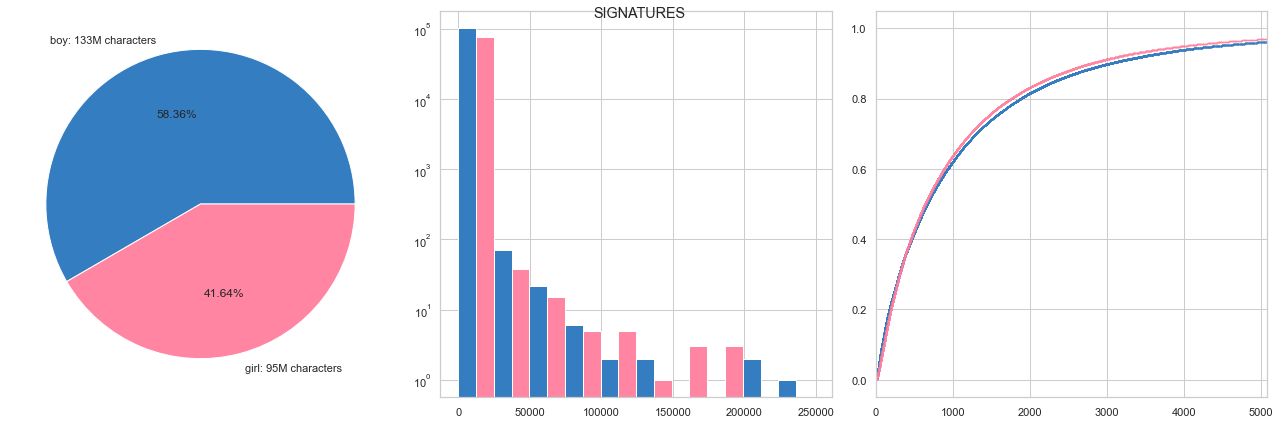

            boy      girl
count 102237.00  77757.00
mean    1302.65   1221.92
std     2672.59   2747.90
min        1.00      1.00
25%      236.00    247.00
50%      660.00    636.00
75%     1554.00   1456.00
max   248665.00 177791.00
#########################
[INDEX 4 INPUT EMAIL]
#########################

Please add the London office to your distribution lists.  DL-Lon EIM Forest Products - Europe

Thanks,

SW

Stacey L. Wales

Stacey Wales
Origination Transaction Support
Enron Industrial Markets
713-345-7186

######################
[INDEX 4, FILTERED WITH signatures]
######################

Please add the London office to your distribution lists.  DL-Lon EIM Forest Products - Europe

Thanks,

SW

Stacey L. Wales

.
.
#########################
[INDEX 7 INPUT EMAIL]
#########################

Cassandra:

Just checking to make sure you were aware that currency swaps are being executed between the above Enron offices.
I came across this issue in connection with a crude trade I'm looking

In [33]:
%%time
plot_gender_character_frequency(df, col=filter_string, new_name='sig_char', suptitle=filter_string, alpha=0.1,)

for idx, old, new in zip(filter_condition[:view_n_entries].index, df.loc[filter_condition[:view_n_entries].index, 'm_body'], df.loc[filter_condition[:view_n_entries].index, filter_string]):
    print('#########################\n[INDEX %s INPUT EMAIL]\n#########################\n' % (idx))
    print(old)
    print('######################\n[INDEX %s, FILTERED WITH %s]\n######################\n' % (idx, filter_string))
    print(new)

## Visualize filter criteria impact

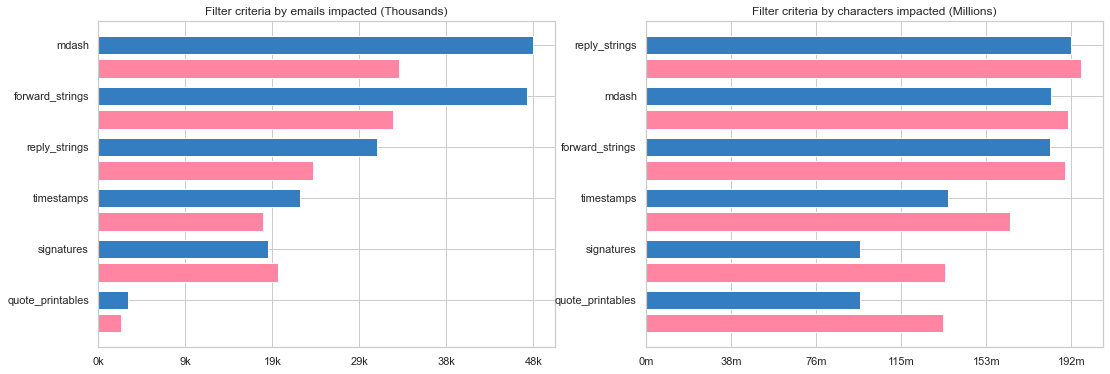

Wall time: 1.3 s


In [34]:
%%time
tick_count = 6

def unzip_filter_dicts(idict):
    filter_labels = []
    boy_values = []
    girl_values = []
    for k, v in idict.items():
        filter_labels.append(k)
        boy_values.append(v[0])
        girl_values.append(v[1])
    z_these = sorted(zip(boy_values, girl_values, filter_labels))
    boy_values, girl_values, filter_labels = zip(*z_these)
    return boy_values, girl_values, filter_labels


plt.figure(figsize=(18,6))

boy_values, girl_values, filter_labels = unzip_filter_dicts(filt_dict) # return number of emails impacted by each filter

plt.subplot(1,2,1)
plt.barh(
    np.linspace(1,len(filter_labels)*2,len(filter_labels)), 
    boy_values, # passing gender value
    tick_label=filter_labels,
    color=['#347DC1'],
)
plt.barh(
    np.linspace(0,len(filter_labels)*2-1,len(filter_labels)), 
    girl_values, # passing gender value
    color=['#FF85A2'],
)

plt.xticks(
    ticks = np.linspace(0,np.max([boy_values]),tick_count),
    labels = ['%dk' % (tic/1000) for tic in np.linspace(0,np.max([boy_values]),tick_count)],
)

plt.title('Filter criteria by emails impacted (Thousands)')


main_char_cnt = np.sum(df['start_char']) # create character dictionary
char_tuples = [
    ('quote_printables', 'qp_char'),
    ('timestamps', 'tm_char'),
    ('forward_strings', 'fwd_char'),
    ('reply_strings', 're_char'),
    ('signatures', 'sig_char'),
    ('mdash', 'mdash_char'),
]

char_dict = {}
for pair in char_tuples:
    char_dict[pair[0]] = [
        main_char_cnt  - np.sum(df.query("gender == 0")[pair[1]]),
        main_char_cnt  - np.sum(df.query("gender == 1")[pair[1]]),
        ]

boy_values, girl_values, filter_labels = unzip_filter_dicts(char_dict) # return character values

plt.subplot(1,2,2)
plt.barh(
    np.linspace(1,len(filter_labels)*2,len(filter_labels)), 
    boy_values, # passing gender value
    tick_label=filter_labels,
    color=['#347DC1'],
)
plt.barh(
    np.linspace(0,len(filter_labels)*2-1,len(filter_labels)), 
    girl_values, # passing gender value
    color=['#FF85A2'],
)

plt.xticks(
    ticks = np.linspace(0,np.max([boy_values]),tick_count),
    labels = ['%dm' % (tic/1000000) for tic in np.linspace(0,np.max([boy_values]),tick_count)],
)

plt.title('Filter criteria by characters impacted (Millions)')
plt.show()

In [35]:
df[['m_body', 'quote_printables', 'timestamps', 'forward_strings', 'reply_strings', 'signatures',]].head(3)

,m_body,quote_printables,timestamps,forward_strings,reply_strings,signatures
0,\n\nErcot is now requiring that we fill out and fax the attached form to them when we have imported/exported across one of the DC ties.\nThe file is located in:\n\nM:electric/24hour/ercot/dc sche...,\n\nErcot is now requiring that we fill out and fax the attached form to them when we have imported/exported across one of the DC ties.\nThe file is located in:\n\nM:electric/24hour/ercot/dc sche...,\n\nErcot is now requiring that we fill out and fax the attached form to them when we have imported/exported across one of the DC ties.\nThe file is located in:\n\nM:electric/24hour/ercot/dc sche...,\n\nErcot is now requiring that we fill out and fax the attached form to them when we have imported/exported across one of the DC ties.\nThe file is located in:\n\nM:electric/24hour/ercot/dc sche...,\n\nErcot is now requiring that we fill out and fax the attached form to them when we have imported/exported across one of the DC ties.\nThe file is located in:\n\nM:electric/24hour/ercot/dc sche...,\n\nErcot is now requiring that we fill out and fax the attached form to them when we have imported/exported across one of the DC ties.\nThe file is located in:\n\nM:electric/24hour/ercot/dc sche...
1,"Issue is headcount approval. In the next 6 months I'm not sure we can commit to any increase, although if we get a flying start in Canada it is possible. While I think we can explore whether UBS a...","Issue is headcount approval. In the next 6 months I'm not sure we can commit to any increase, although if we get a flying start in Canada it is possible. While I think we can explore whether UBS a...","Issue is headcount approval. In the next 6 months I'm not sure we can commit to any increase, although if we get a flying start in Canada it is possible. While I think we can explore whether UBS a...","Issue is headcount approval. In the next 6 months I'm not sure we can commit to any increase, although if we get a flying start in Canada it is possible. While I think we can explore whether UBS a...","Issue is headcount approval. In the next 6 months I'm not sure we can commit to any increase, although if we get a flying start in Canada it is possible. While I think we can explore whether UBS a...","Issue is headcount approval. In the next 6 months I'm not sure we can commit to any increase, although if we get a flying start in Canada it is possible. While I think we can explore whether UBS a..."
2,Amy Kim is still an open question.\nI think it's fine to put all charitable contribuitions in one place. Are they transferring $ or just responsibilitiy?\nI want to show Jeff the year-to-year dif...,Amy Kim is still an open question.\nI think it's fine to put all charitable contribuitions in one place. Are they transferring $ or just responsibilitiy?\nI want to show Jeff the year-to-year dif...,Amy Kim is still an open question.\nI think it's fine to put all charitable contribuitions in one place. Are they transferring $ or just responsibilitiy?\nI want to show Jeff the year-to-year dif...,Amy Kim is still an open question.\nI think it's fine to put all charitable contribuitions in one place. Are they transferring $ or just responsibilitiy?\nI want to show Jeff the year-to-year dif...,Amy Kim is still an open question.\nI think it's fine to put all charitable contribuitions in one place. Are they transferring $ or just responsibilitiy?\nI want to show Jeff the year-to-year dif...,Amy Kim is still an open question.\nI think it's fine to put all charitable contribuitions in one place. Are they transferring $ or just responsibilitiy?\nI want to show Jeff the year-to-year dif...


## Apply filters

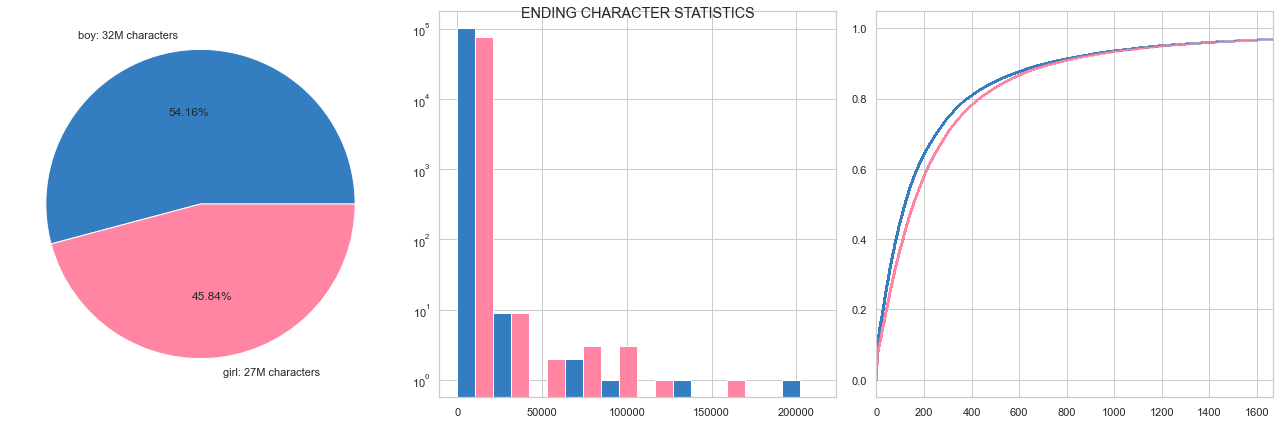

            boy      girl
count 102237.00  77757.00
mean     320.49    356.73
std     1211.18   1323.94
min        0.00      0.00
25%       38.00     55.00
50%      118.00    153.00
75%      302.00    351.00
max   212476.00 151981.00
Starting Count: 230M
mdash_function: 85M, DIFF: 144M
quote_printables_function: 85M, DIFF: 0M
timestamps_function: 70M, DIFF: 14M
forward_strings_function: 69M, DIFF: 0M
reply_strings_function: 61M, DIFF: 7M
signatures_function: 60M, DIFF: 1M
Wall time: 2min 1s


In [36]:
%%time
user_function_list = [
    mdash_function,
    quote_printables_function,
    timestamps_function,
    forward_strings_function,
    reply_strings_function,
    signatures_function,
]

df['clean_body'] = df['m_body'].copy() # create column for applying all filters at once

output_strings = [] # catch count changes for printout
_old = just_character_counts(df, 'clean_body')
output_strings.append('Starting Count: %dM' % (_old/1000000))

for user_function in user_function_list:
    
    returns_dict = {}
    df = threadpool_executor(io_func=user_function, df=df, series='clean_body', merge_back='series', idict=returns_dict, new_name=None)
    
    _new = just_character_counts(df, 'clean_body') # printout
    _string = '%s: %dM, DIFF: %dM' % (user_function.__name__, _new/1000000, (_old-_new)/1000000)
    output_strings.append(_string)
    _old = _new.copy()
    
ending_plot = plot_gender_character_frequency(df, col='clean_body', new_name='clean_char', suptitle='Ending Character Statistics', alpha=0.1)

for _string in output_strings:
    print(_string)

In [37]:
%%time
out_frame = df.copy()
out_frame = out_frame.drop(['n_char', 'start_char',
       'quote_printables', 'qp_char', 'timestamps', 'tm_char',
       'forward_strings', 'fwd_char', 'reply_strings', 're_char', 'signatures',
       'sig_char', 'mdash', 'mdash_char',], axis=1)
out_frame = out_frame[out_frame['clean_body'] != '']

Wall time: 280 ms


### Resample, reindex

In [38]:
def resample_frame(df, random_state=random_state):
    df = df.sample(n=len(df), random_state=random_state).reset_index(drop=True)
    return df
out_frame = resample_frame(out_frame) # resampled

### Output

In [39]:
out_frame.to_csv('./data/enron/clean_clean_by_splits.csv')

### End

In [40]:
end_time = time.perf_counter()
print('Run time: %.1fs (~%dm)' % ((end_time-start_time, (end_time-start_time)/60)))

Run time: 397.3s (~6m)


In [41]:
%%time
for idx, old, new in zip(df.index[:50], df['m_body'][:50], df['clean_body'][:50]):
    print('#########################\n[INDEX %s INPUT]\n#########################\n' % (idx))
    print(old)
    print('######################\n[INDEX %s, FILTERED]\n######################\n' % (idx))
    print(new)

#########################
[INDEX 0 INPUT]
#########################



Ercot is now requiring that we fill out and fax the attached form to  them when we have imported/exported across one of the DC ties.
The file is located in:

M:electric/24hour/ercot/dc schedlist.spreadsheet.


Please update tag number,  megawatts (positive for exports, negative for imports),   and total number of schedules.

 
######################
[INDEX 0, FILTERED]
######################



Ercot is now requiring that we fill out and fax the attached form to  them when we have imported/exported across one of the DC ties.
The file is located in:

M:electric/24hour/ercot/dc schedlist.spreadsheet.


Please update tag number,  megawatts (positive for exports, negative for imports),   and total number of schedules.

 
#########################
[INDEX 1 INPUT]
#########################

Issue is headcount approval. In the next 6 months I'm not sure we can commit to any increase, although if we get a flying start in Ca